In [4]:
import seaborn as sns
%matplotlib inline

In [5]:
sns.set(style="darkgrid")

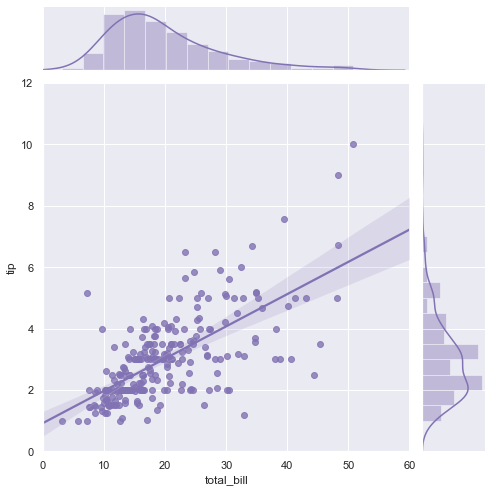

In [6]:
tips = sns.load_dataset("tips")
g = sns.jointplot(x="total_bill", y="tip", data=tips,
                  kind="reg", truncate=False,
                  xlim=(0, 60), ylim=(0, 12),
                  color="m", height=7)

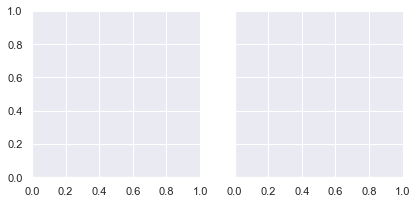

In [7]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

AttributeError: module 'seaborn' has no attribute 'histplot'

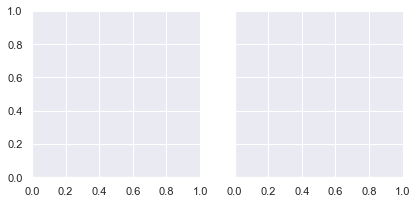

In [11]:
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip")

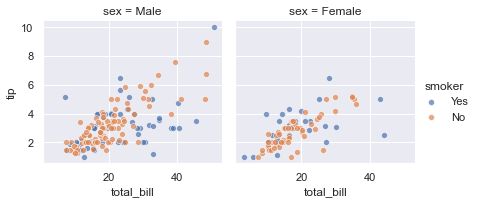

In [12]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.7)
g.add_legend()

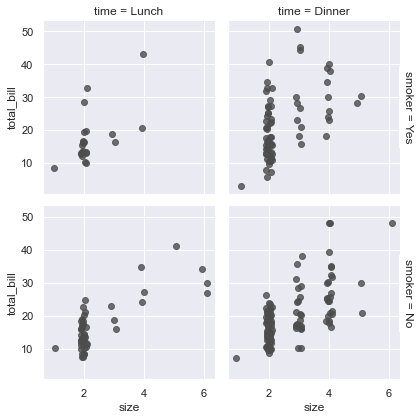

In [13]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1)

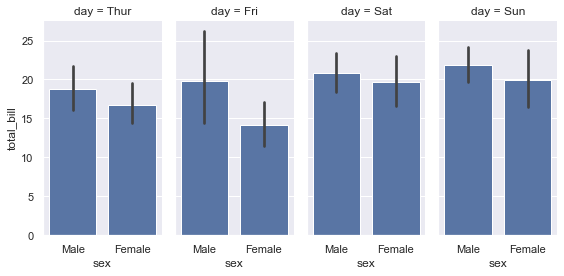

In [14]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"])

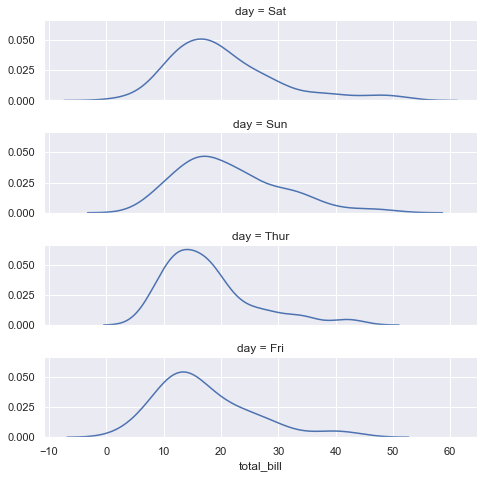

In [15]:
ordered_days = tips.day.value_counts().index
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill")

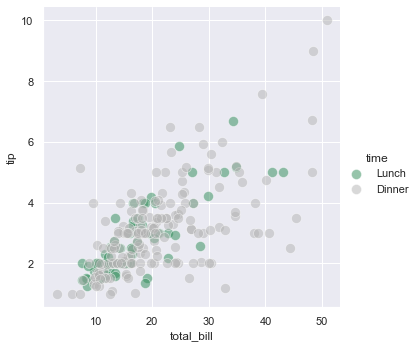

In [16]:
pal = dict(Lunch="seagreen", Dinner=".7")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(sns.scatterplot, "total_bill", "tip", s=100, alpha=.5)
g.add_legend()